# Exploratory Data Analysis with Machine Learning

We are given data on the adults of a particular survey along with their income , their race, age,sex,graduation marks ,etc. We are to perform Exploratory Data Analysis on this data , with the detection of outliers and building some Machine Learning models.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('F:\Indrajit\Innomatics Internship')
adult = pd.read_csv('adult.csv', na_values = ['?'])
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data = adult.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.shape

(48842, 15)

In [7]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

As there are many missing "N/A" values, we a drop the rows containing the "N/A values before procceding to further calculations."

In [8]:
data = data.dropna(axis = 0)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
data.shape

(45222, 15)

In [10]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

We see that there are no missing values in the data now.The data is ready for further computations.



# Univariate Analysis

In [12]:
#First extracting the numerical columns and then procced to further calculations
numerical_data = data.select_dtypes(exclude=object)
numerical_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

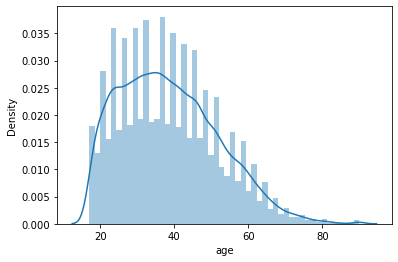

In [13]:
sns.distplot(numerical_data['age'] , hist = True , kde = True )

The data is more or less symmetric in nature.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

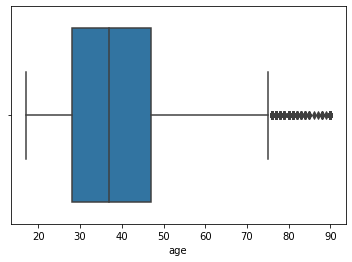

In [14]:
sns.boxplot(numerical_data['age'])



The data contains considerable outliers.

In [15]:
#Outlier detection by Z-SCORE METHOD
outlier=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outlier.append(i)
    print("Outliers:",outlier)
Zscore_outlier(numerical_data['age'])

Outliers: [80, 90, 80, 81, 82, 81, 85, 80, 90, 81, 89, 83, 81, 82, 80, 90, 81, 83, 90, 90, 80, 80, 81, 90, 85, 90, 81, 81, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 79, 81, 81, 90, 82, 90, 81, 88, 80, 81, 80, 81, 90, 84, 80, 80, 83, 79, 79, 90, 81, 90, 88, 90, 90, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 80, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 84, 79, 90, 80, 81, 81, 90, 80, 82, 90, 90, 85]


In [16]:
#Outlier detection by WINSORIZATION METHOD(PERCENTILE CAPPING)
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(numerical_data['age'])

Outliers: [80, 90, 80, 77, 81, 74, 78, 82, 74, 75, 74, 81, 85, 77, 74, 78, 77, 80, 77, 74, 74, 90, 74, 76, 81, 77, 77, 77, 76, 74, 76, 76, 77, 89, 74, 74, 74, 74, 77, 75, 77, 78, 76, 77, 75, 77, 83, 81, 76, 82, 80, 90, 81, 77, 83, 75, 90, 90, 78, 80, 76, 77, 76, 75, 80, 76, 75, 81, 90, 76, 76, 74, 85, 90, 81, 81, 74, 80, 77, 78, 79, 81, 75, 80, 88, 87, 76, 74, 90, 78, 76, 77, 79, 83, 79, 75, 74, 80, 75, 79, 74, 81, 78, 75, 81, 76, 75, 74, 90, 74, 76, 74, 74, 82, 77, 76, 75, 75, 90, 75, 81, 88, 75, 80, 81, 80, 81, 76, 77, 90, 75, 77, 75, 75, 75, 84, 80, 80, 83, 79, 79, 76, 90, 75, 77, 76, 74, 81, 78, 90, 88, 75, 90, 77, 75, 75, 74, 90, 74, 77, 74, 78, 80, 90, 81, 75, 75, 74, 74, 81, 76, 75, 80, 75, 90, 76, 75, 79, 76, 81, 75, 76, 90, 90, 80, 90, 90, 74, 79, 78, 79, 84, 90, 77, 75, 74, 80, 75, 77, 90, 75, 81, 83, 74, 84, 79, 76, 85, 82, 79, 77, 90, 76, 90, 74, 84, 78, 78, 76, 80, 90, 74, 74, 90, 77, 76, 74, 74, 84, 75, 76, 74, 90, 76, 90, 76, 75, 74, 77, 90, 77, 78, 77, 81, 75, 75, 74, 7

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

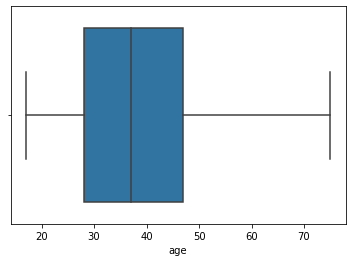

In [16]:
temp1 = numerical_data[numerical_data['age']<76]
sns.boxplot(temp1['age'])

The data is now free from outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

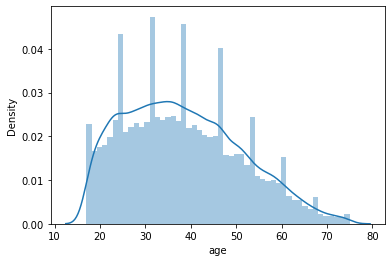

In [17]:
sns.distplot(temp1['age'] ,kde = True , hist = True)

In [18]:
#Frequency Plot
pd.crosstab(index = temp1['age'] , columns = 'count')

col_0,count
age,
17,493
18,695
19,864
20,916
21,935
22,1034
23,1241
24,1130
25,1133


In [19]:
#Probability Distribution
pd.crosstab(index = temp1['age'] , columns = 'Probability' , normalize = True )

col_0,Probability
age,
17,0.010967
18,0.015461
19,0.019220
20,0.020377
21,0.020800
22,0.023002
23,0.027607
24,0.025137
25,0.025204


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

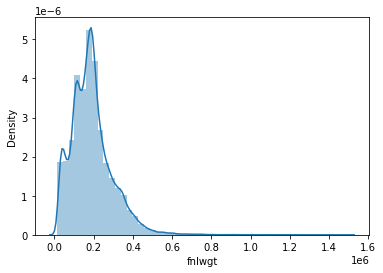

In [20]:
sns.distplot(numerical_data['fnlwgt'] , hist = True , kde = True )

The data is more or less symmetric and platykurtic.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

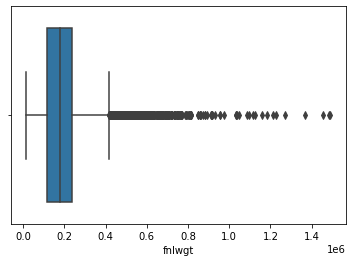

In [21]:
sns.boxplot(numerical_data['fnlwgt'])

The data contains outliers to the right. We shall trim the outliers.

In [21]:
#Outlier detection by Z-SCORE METHOD
outlier=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outlier.append(i)
    print("Outliers:",outlier)
Zscore_outlier(numerical_data['fnlwgt'])

Outliers: [537222, 512864, 599057, 542610, 652784, 573446, 662460, 629900, 509364, 632733, 560313, 651702, 644278, 535852, 581128, 608881, 914061, 624006, 510072, 593246, 714597, 816750, 552529, 575172, 622192, 566066, 614113, 548568, 789600, 864960, 723746, 692831, 535869, 638116, 698039, 677398, 547931, 666014, 765214, 761800, 1047822, 544319, 617917, 522881, 750972, 589155, 538193, 588739, 588484, 806552, 858091, 663291, 581025, 656488, 557349, 655066, 737315, 541755, 594521, 589838, 605504, 558752, 772919, 884434, 604045, 697806, 632271, 587310, 538243, 1490400, 764638, 718736, 882849, 746660, 786418, 565313, 653215, 576645, 510643, 538099, 539019, 531055, 594187, 685955, 548361, 606111, 592029, 513977, 647591, 566066, 553588, 624572, 535740, 607118, 580591, 557853, 635913, 557805, 626493, 914061, 557349, 953588, 558344, 590204, 679853, 535762, 814850, 874728, 506830, 594194, 538583, 602513, 589809, 507492, 546118, 530099, 1117718, 849067, 590941, 572285, 608441, 720428, 557359, 59

In [22]:
#Outlier detection by WINSORIZATION METHOD(PERCENTILE CAPPING)
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(numerical_data['fnlwgt'])

Outliers: [26669, 537222, 21175, 26716, 22463, 512864, 599057, 20308, 542610, 25124, 652784, 26915, 573446, 22502, 23778, 22211, 662460, 629900, 25610, 13769, 23940, 632733, 24361, 21755, 26502, 560313, 651702, 644278, 535852, 20469, 23037, 26145, 22154, 24274, 581128, 608881, 24504, 24008, 26698, 24244, 914061, 25955, 624006, 510072, 24896, 22419, 593246, 714597, 816750, 552529, 24896, 575172, 22149, 25497, 622192, 21412, 566066, 22149, 614113, 23500, 21764, 548568, 23074, 789600, 864960, 723746, 21838, 21626, 692831, 535869, 638116, 698039, 25319, 19513, 677398, 547931, 19302, 21189, 22313, 666014, 19522, 765214, 761800, 1047822, 544319, 617917, 522881, 23336, 20308, 24529, 23856, 750972, 589155, 538193, 26252, 23778, 26842, 588739, 588484, 27086, 806552, 858091, 22154, 663291, 23580, 581025, 656488, 557349, 24740, 24790, 655066, 26585, 737315, 541755, 594521, 23940, 26671, 589838, 605504, 26543, 558752, 22743, 772919, 884434, 22228, 21154, 604045, 26252, 697806, 632271, 587310, 1376

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educational-num', ylabel='Density'>

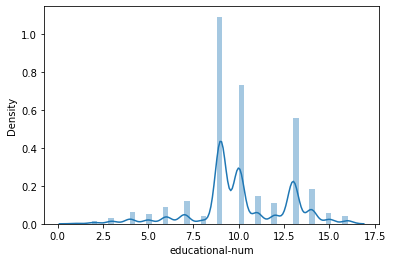

In [96]:
sns.distplot(numerical_data['educational-num'] , hist = True , kde = True )

The data is a multimodal data.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educational-num'>

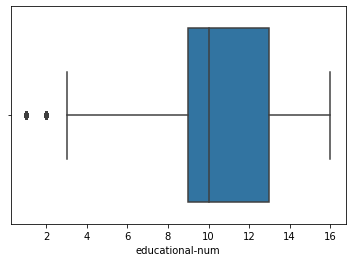

In [97]:
sns.boxplot(numerical_data['educational-num'])

The data contains two outliers to the left.

In [17]:
#Outlier detection by Z-SCORE METHOD
outlier=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outlier.append(i)
    print("Outliers:",outlier)
Zscore_outlier(numerical_data['educational-num'])

Outliers: [2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1]


In [18]:
#Outlier detection by WINSORIZATION METHOD(PERCENTILE CAPPING)
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(numerical_data['educational-num'])

Outliers: [2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1]


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educational-num'>

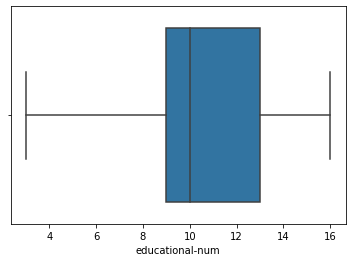

In [98]:
temp3 = numerical_data[numerical_data['educational-num']>2]
sns.boxplot(temp3['educational-num'])

The data is now free from outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educational-num', ylabel='Density'>

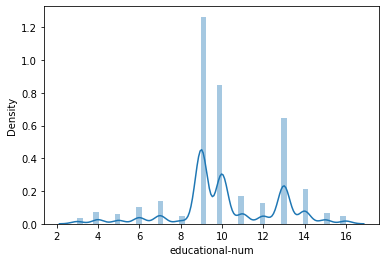

In [99]:
sns.distplot(temp3['educational-num'] , hist = True , kde = True)

In [100]:
#Frequency
pd.crosstab(index = temp3['educational-num'] , columns = 'counts' )

col_0,counts
educational-num,
3,449
4,823
5,676
6,1223
7,1619
8,577
9,14783
10,9899
11,1959


In [101]:
#Probability Distribution
pd.crosstab(index = temp3['educational-num'] , columns = 'Probability' , normalize = True )

col_0,Probability
educational-num,
3,0.009994
4,0.018318
5,0.015046
6,0.027221
7,0.036035
8,0.012843
9,0.329038
10,0.220330
11,0.043603


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

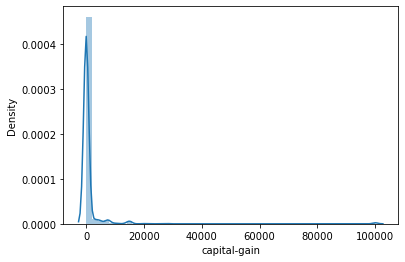

In [102]:
sns.distplot(numerical_data['capital-gain'] , hist = True , kde = True )

The data is platykurtic with more or less symmetricity.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain'>

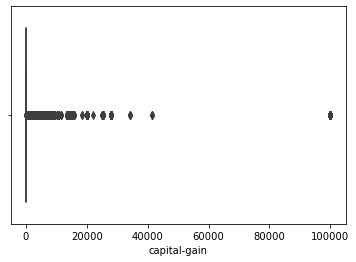

In [19]:
sns.boxplot(numerical_data['capital-gain'])

The data contains outliers.We first trim the outliers.

In [20]:
#Outlier detection by Z-SCORE METHOD
outlier=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outlier.append(i)
    print("Outliers:",outlier)
Zscore_outlier(numerical_data['capital-gain'])

Outliers: [27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 25236, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 41310, 99999, 99999, 34095, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 27828, 27828, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 25236, 99999, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 25236, 27828, 27828, 27828, 27828, 99999, 27828, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 27828, 25236, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 34095, 99999, 99999, 27828, 99999, 99999, 99999, 99

In [21]:
#Outlier detection by WINSORIZATION METHOD(PERCENTILE CAPPING)
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(numerical_data['capital-gain'])

Outliers: [27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 25236, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 20051, 99999, 99999, 99999, 99999, 20051, 99999, 99999, 99999, 99999, 99999, 27828, 41310, 99999, 99999, 34095, 20051, 99999, 99999, 99999, 15831, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 27828, 27828, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 20051, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 99999, 20051, 99999, 99999, 20051, 15831, 99999, 99999, 20051, 99999, 99999, 99999, 27828, 25236, 99999, 27828, 99999, 20051, 20051, 27828, 99999, 99999, 99999, 20051, 99999, 99999, 99999, 99999, 25236, 27828, 27828, 27828, 27828, 99999, 20051, 27828, 99999, 99999, 99999, 99999, 27828, 99999, 27828, 25124, 99999, 99999, 99999, 99999, 27828, 20051, 25236, 99999, 99999, 20051, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 20051, 99999, 99999, 99

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-gain'>

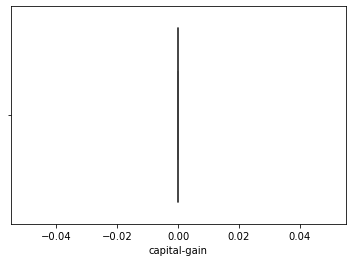

In [22]:

temp4 = numerical_data[numerical_data['capital-gain']<100]
sns.boxplot(temp4['capital-gain'])

The data is now free from outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

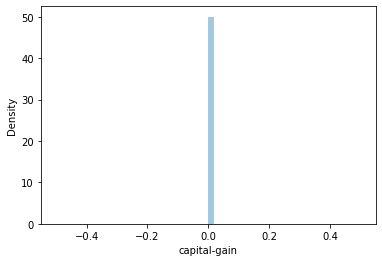

In [105]:

sns.distplot(temp4['capital-gain'] , hist = True , kde = True)

In [106]:
#Frequency
pd.crosstab(index = temp4['capital-gain'] , columns = 'counts' )

col_0,counts
capital-gain,
0,41432


In [107]:
#Probability
pd.crosstab(index = temp4['capital-gain'] , columns = 'probability' , normalize = True ) 

col_0,probability
capital-gain,
0,1.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

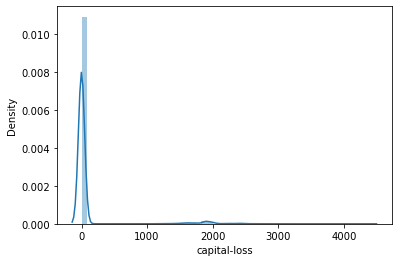

In [108]:
sns.distplot(numerical_data['capital-loss'] , hist = True , kde = True )

The data is symmetric but leptokurtic.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

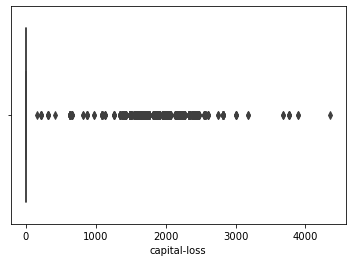

In [109]:
sns.boxplot(numerical_data['capital-loss'])


The data contains outliers. We first trim them.

In [23]:
#Outlier detection by WINSORIZATION METHOD(PERCENTILE CAPPING)
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(numerical_data['hours-per-week'])

Outliers: [90, 84, 84, 8, 99, 96, 8, 90, 8, 3, 1, 99, 84, 99, 8, 2, 8, 4, 7, 99, 84, 3, 5, 8, 99, 92, 8, 8, 3, 84, 7, 8, 99, 5, 84, 85, 8, 4, 6, 99, 8, 5, 8, 4, 2, 84, 5, 8, 99, 6, 98, 84, 96, 8, 4, 90, 4, 8, 84, 8, 90, 8, 86, 4, 8, 84, 5, 99, 8, 5, 8, 6, 5, 9, 85, 8, 6, 3, 6, 4, 8, 84, 99, 4, 84, 99, 99, 99, 99, 90, 8, 96, 2, 99, 99, 90, 8, 8, 99, 88, 8, 5, 8, 2, 90, 5, 6, 5, 4, 4, 84, 2, 8, 6, 84, 3, 4, 1, 5, 84, 99, 8, 89, 98, 5, 90, 4, 99, 5, 9, 7, 99, 99, 8, 99, 6, 99, 99, 90, 8, 8, 84, 3, 5, 1, 99, 99, 99, 8, 8, 99, 88, 5, 8, 6, 3, 8, 4, 90, 85, 7, 84, 7, 4, 3, 8, 98, 99, 5, 4, 99, 8, 99, 1, 4, 9, 8, 99, 96, 84, 99, 6, 6, 1, 99, 6, 6, 7, 99, 99, 5, 5, 6, 84, 90, 5, 5, 2, 99, 99, 3, 85, 99, 8, 3, 99, 8, 7, 99, 9, 2, 99, 7, 4, 6, 8, 7, 8, 99, 99, 2, 86, 7, 3, 2, 84, 5, 6, 8, 8, 84, 8, 84, 4, 4, 7, 9, 6, 8, 6, 7, 9, 99, 9, 90, 4, 6, 84, 5, 92, 7, 84, 8, 84, 8, 90, 8, 2, 1, 98, 6, 6, 8, 9, 8, 5, 6, 7, 99, 99, 7, 5, 90, 5, 9, 8, 6, 90, 84, 8, 99, 6, 5, 90, 84, 3, 6, 8, 5, 5, 8, 98, 85

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital-loss'>

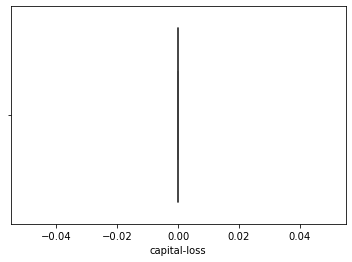

In [24]:
temp5=numerical_data[numerical_data['capital-loss']<100]
sns.boxplot(temp5['capital-loss'])

The data is now free from outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

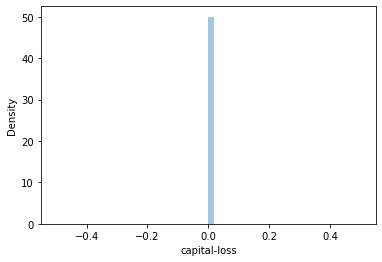

In [25]:
sns.distplot(temp5['capital-loss'] , hist = True , kde = True)

In [26]:


#Frequency
pd.crosstab(index = temp5['capital-loss'] , columns = 'count' )

col_0,count
capital-loss,
0,43082


In [27]:
#Probability
pd.crosstab(index = temp5['capital-loss'] , columns = 'probability' , normalize = True )

col_0,probability
capital-loss,
0,1.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

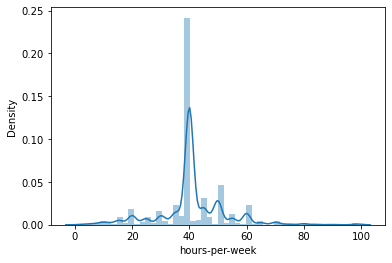

In [28]:
sns.distplot(numerical_data['hours-per-week'] , hist = True , kde = True )

The data is symmetric more or less with multiple modes.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

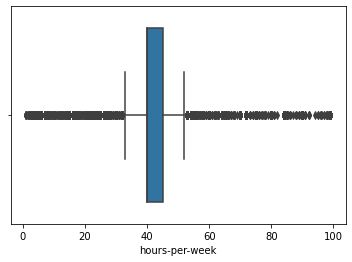

In [29]:
sns.boxplot(numerical_data['hours-per-week'])

The data contains outliers.We get rid of them.

In [30]:
#Outlier detection by WINSORIZATION METHOD(PERCENTILE CAPPING)
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(numerical_data['hours-per-week'])

Outliers: [90, 84, 84, 8, 99, 96, 8, 90, 8, 3, 1, 99, 84, 99, 8, 2, 8, 4, 7, 99, 84, 3, 5, 8, 99, 92, 8, 8, 3, 84, 7, 8, 99, 5, 84, 85, 8, 4, 6, 99, 8, 5, 8, 4, 2, 84, 5, 8, 99, 6, 98, 84, 96, 8, 4, 90, 4, 8, 84, 8, 90, 8, 86, 4, 8, 84, 5, 99, 8, 5, 8, 6, 5, 9, 85, 8, 6, 3, 6, 4, 8, 84, 99, 4, 84, 99, 99, 99, 99, 90, 8, 96, 2, 99, 99, 90, 8, 8, 99, 88, 8, 5, 8, 2, 90, 5, 6, 5, 4, 4, 84, 2, 8, 6, 84, 3, 4, 1, 5, 84, 99, 8, 89, 98, 5, 90, 4, 99, 5, 9, 7, 99, 99, 8, 99, 6, 99, 99, 90, 8, 8, 84, 3, 5, 1, 99, 99, 99, 8, 8, 99, 88, 5, 8, 6, 3, 8, 4, 90, 85, 7, 84, 7, 4, 3, 8, 98, 99, 5, 4, 99, 8, 99, 1, 4, 9, 8, 99, 96, 84, 99, 6, 6, 1, 99, 6, 6, 7, 99, 99, 5, 5, 6, 84, 90, 5, 5, 2, 99, 99, 3, 85, 99, 8, 3, 99, 8, 7, 99, 9, 2, 99, 7, 4, 6, 8, 7, 8, 99, 99, 2, 86, 7, 3, 2, 84, 5, 6, 8, 8, 84, 8, 84, 4, 4, 7, 9, 6, 8, 6, 7, 9, 99, 9, 90, 4, 6, 84, 5, 92, 7, 84, 8, 84, 8, 90, 8, 2, 1, 98, 6, 6, 8, 9, 8, 5, 6, 7, 99, 99, 7, 5, 90, 5, 9, 8, 6, 90, 84, 8, 99, 6, 5, 90, 84, 3, 6, 8, 5, 5, 8, 98, 85

In [31]:
#Outlier detection by Z-SCORE METHOD
outlier=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            outlier.append(i)
    print("Outliers:",outlier)
Zscore_outlier(numerical_data['hours-per-week'])

Outliers: [90, 84, 80, 84, 80, 99, 80, 80, 96, 90, 3, 1, 99, 80, 80, 84, 99, 2, 4, 78, 80, 99, 84, 80, 3, 80, 80, 80, 99, 92, 3, 80, 84, 77, 99, 80, 84, 85, 4, 99, 4, 2, 84, 80, 99, 98, 84, 77, 96, 4, 80, 90, 4, 78, 84, 80, 90, 80, 86, 80, 4, 84, 80, 99, 80, 85, 80, 80, 80, 80, 3, 4, 80, 84, 99, 4, 80, 84, 99, 99, 99, 99, 90, 80, 96, 2, 99, 99, 90, 99, 80, 88, 2, 80, 80, 90, 79, 4, 4, 78, 84, 2, 80, 84, 3, 4, 1, 84, 99, 89, 98, 80, 80, 90, 4, 80, 99, 80, 78, 99, 99, 80, 80, 80, 99, 80, 99, 99, 80, 80, 90, 80, 78, 84, 3, 80, 80, 1, 99, 99, 99, 80, 99, 88, 3, 4, 90, 80, 85, 84, 4, 3, 98, 80, 99, 80, 4, 99, 99, 1, 4, 99, 96, 84, 99, 80, 1, 77, 99, 99, 99, 84, 90, 2, 99, 99, 3, 85, 99, 3, 99, 80, 80, 99, 2, 99, 80, 4, 80, 99, 99, 80, 2, 80, 86, 80, 3, 80, 2, 84, 80, 80, 84, 80, 84, 4, 4, 80, 80, 80, 99, 80, 90, 4, 84, 92, 80, 80, 80, 84, 84, 80, 90, 80, 80, 80, 2, 1, 98, 80, 80, 80, 99, 80, 80, 99, 80, 80, 78, 90, 80, 80, 90, 84, 99, 80, 90, 84, 3, 98, 80, 85, 84, 80, 3, 84, 99, 80, 84, 84

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

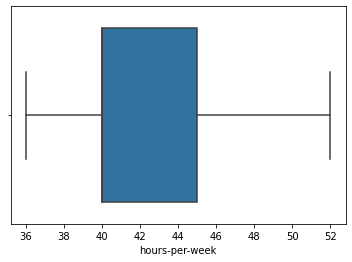

In [32]:
temp6 = numerical_data[(numerical_data['hours-per-week']>35) & (numerical_data['hours-per-week']<53)]
sns.boxplot(temp6['hours-per-week'])

The data is now free from outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

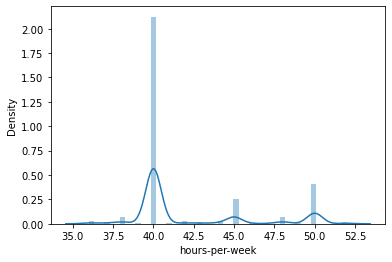

In [33]:

sns.distplot(temp6['hours-per-week'] , hist = True , kde = True)

In [34]:
#Frequency
pd.crosstab(index = temp6['hours-per-week'] , columns = 'counts' )

col_0,counts
hours-per-week,
36,308
37,236
38,681
39,62
40,21358
41,56
42,326
43,219
44,301


In [35]:
#Probability
pd.crosstab(index = temp6['hours-per-week'] , columns = 'probability' , normalize = True )

col_0,probability
hours-per-week,
36,0.009796
37,0.007506
38,0.021660
39,0.001972
40,0.679304
41,0.001781
42,0.010369
43,0.006965
44,0.009573


In [36]:
#First extracting the categorical columns and then procced to further calculations
categorical_data = data.select_dtypes(include=object)
categorical_data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [37]:
pd.crosstab(index = categorical_data['workclass'] , columns = 'counts')

col_0,counts
workclass,
Federal-gov,1406
Local-gov,3100
Private,33307
Self-emp-inc,1646
Self-emp-not-inc,3796
State-gov,1946
Without-pay,21


<Figure size 720x720 with 0 Axes>

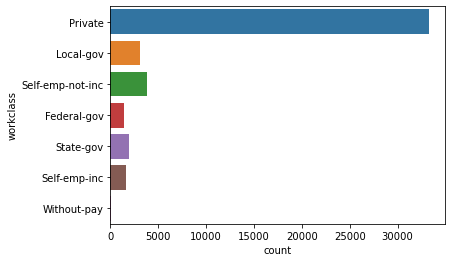

<Figure size 720x720 with 0 Axes>

In [38]:

workclass_data = np.sort(categorical_data['workclass'])
sns.countplot(y = categorical_data['workclass'])
plt.figure(figsize = (10,10))

In [123]:
pd.crosstab(index = categorical_data['education'] , columns = 'counts')

col_0,counts
education,
10th,1223
11th,1619
12th,577
1st-4th,222
5th-6th,449
7th-8th,823
9th,676
Assoc-acdm,1507
Assoc-voc,1959


<Figure size 720x720 with 0 Axes>

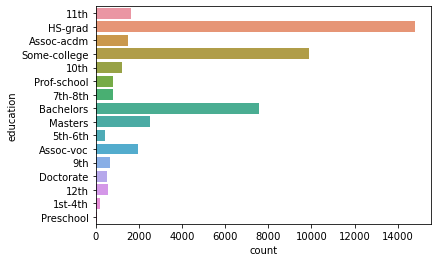

<Figure size 720x720 with 0 Axes>

In [124]:
education_data = np.sort(categorical_data['education'])
sns.countplot(y = categorical_data['education'])
plt.figure(figsize = (10,10))

In [125]:
pd.crosstab(index = categorical_data['marital-status'] , columns = 'counts')

col_0,counts
marital-status,
Divorced,6297
Married-AF-spouse,32
Married-civ-spouse,21055
Married-spouse-absent,552
Never-married,14598
Separated,1411
Widowed,1277


<Figure size 720x720 with 0 Axes>

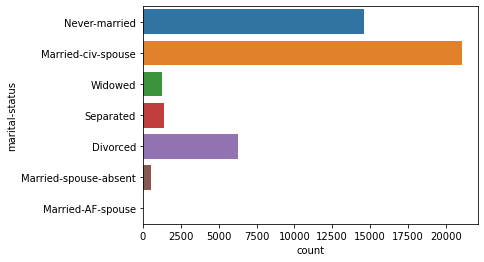

<Figure size 720x720 with 0 Axes>

In [126]:
marital_data = np.sort(categorical_data['marital-status'])
sns.countplot(y = categorical_data['marital-status'])
plt.figure(figsize = (10,10))

In [127]:
pd.crosstab(index = categorical_data['occupation'] , columns = 'counts')

col_0,counts
occupation,
Adm-clerical,5540
Armed-Forces,14
Craft-repair,6020
Exec-managerial,5984
Farming-fishing,1480
Handlers-cleaners,2046
Machine-op-inspct,2970
Other-service,4808
Priv-house-serv,232


<Figure size 720x720 with 0 Axes>

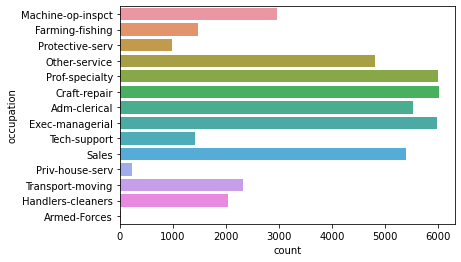

<Figure size 720x720 with 0 Axes>

In [128]:
occup_data = np.sort(categorical_data['occupation'])
sns.countplot(y = categorical_data['occupation'])
plt.figure(figsize = (10,10))


In [129]:
pd.crosstab(index = categorical_data['relationship'] , columns = 'counts')

col_0,counts
relationship,
Husband,18666
Not-in-family,11702
Other-relative,1349
Own-child,6626
Unmarried,4788
Wife,2091


<Figure size 720x720 with 0 Axes>

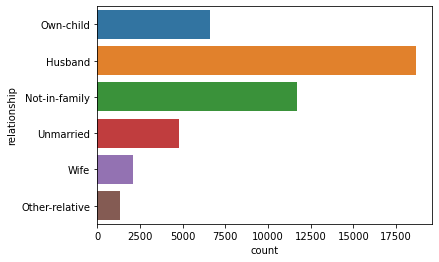

<Figure size 720x720 with 0 Axes>

In [130]:
relate_data = np.sort(categorical_data['relationship'])
sns.countplot(y = categorical_data['relationship'])
plt.figure(figsize = (10,10))

In [131]:
pd.crosstab(index = categorical_data['race'] , columns = 'counts')

col_0,counts
race,
Amer-Indian-Eskimo,435
Asian-Pac-Islander,1303
Black,4228
Other,353
White,38903


<Figure size 720x720 with 0 Axes>

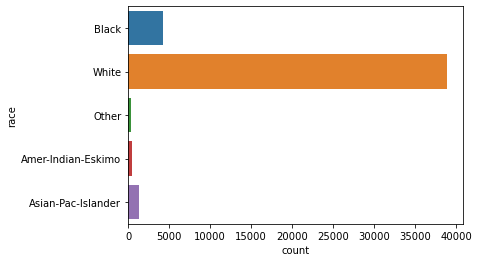

<Figure size 720x720 with 0 Axes>

In [132]:
race_data = np.sort(categorical_data['race'])
sns.countplot(y = categorical_data['race'])
plt.figure(figsize = (10,10))

In [133]:
pd.crosstab(index = categorical_data['gender'] , columns = 'counts')

col_0,counts
gender,
Female,14695
Male,30527


<Figure size 720x720 with 0 Axes>

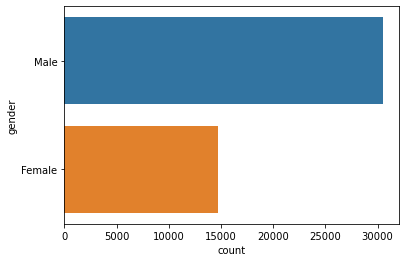

<Figure size 720x720 with 0 Axes>

In [134]:
gender_data = np.sort(categorical_data['gender'])
sns.countplot(y = categorical_data['gender'])
plt.figure(figsize = (10,10))

In [135]:
pd.crosstab(index = categorical_data['native-country'] , columns = 'counts')

col_0,counts
native-country,
Cambodia,26
Canada,163
China,113
Columbia,82
Cuba,133
Dominican-Republic,97
Ecuador,43
El-Salvador,147
England,119


<Figure size 720x720 with 0 Axes>

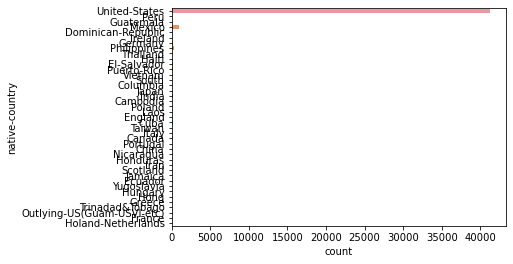

<Figure size 720x720 with 0 Axes>

In [136]:
natcon_data = np.sort(categorical_data['native-country'])
sns.countplot(y = categorical_data['native-country'])
plt.figure(figsize = (10,10))

In [137]:
pd.crosstab(index = categorical_data['income'] , columns = 'counts')

col_0,counts
income,
<=50K,34014
>50K,11208


<Figure size 720x720 with 0 Axes>

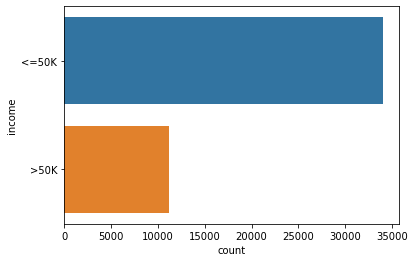

<Figure size 720x720 with 0 Axes>

In [138]:
Income_data = np.sort(categorical_data['income'])
sns.countplot(y = categorical_data['income'])
plt.figure(figsize = (10,10))

# Bivariate Analysis

In [139]:
#First extracting the numerical columns and then procced to further calculations
numerical_data = data.select_dtypes(exclude=object)
numerical_data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


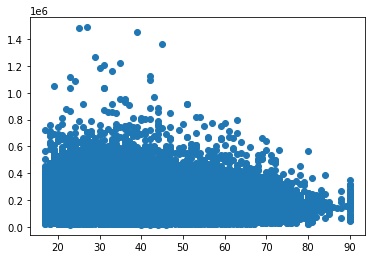

In [140]:
plt.scatter(numerical_data['age'] , numerical_data['fnlwgt'])

There is no relationship between them at all.

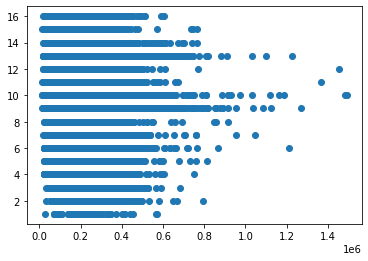

In [142]:
plt.scatter(numerical_data['fnlwgt'] , numerical_data['educational-num'])

There is no linear relationship between them.

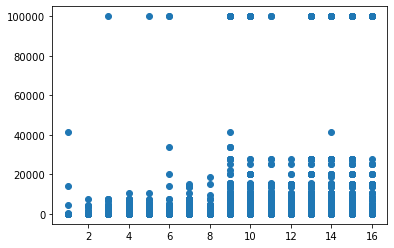

In [143]:
plt.scatter(numerical_data['educational-num'] , numerical_data['capital-gain'])

There is no linear relationship.

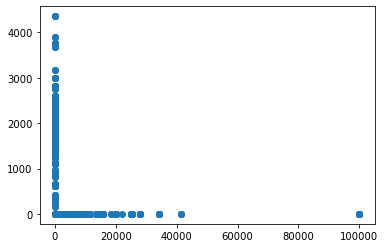

In [14]:
plt.scatter(numerical_data['capital-gain'] , numerical_data['capital-loss'])

There is no linear relationship between them.

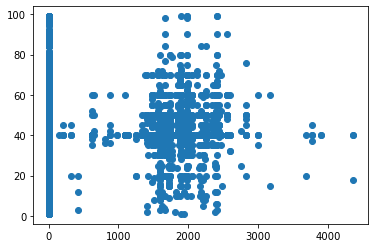

In [15]:
plt.scatter(numerical_data['capital-loss'] , numerical_data['hours-per-week'])

There is no linear relationship.

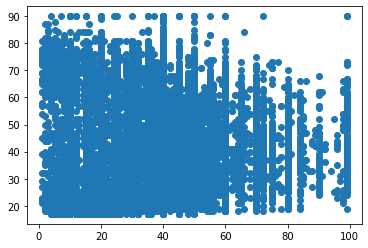

In [16]:
plt.scatter(numerical_data['hours-per-week'] , numerical_data['age'])

There is also no linear relationship.

In [55]:
#First extracting the categorical columns and then procced to further calculations
categorical_data = data.select_dtypes(include=object)
categorical_data

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


<AxesSubplot:xlabel='age', ylabel='workclass'>

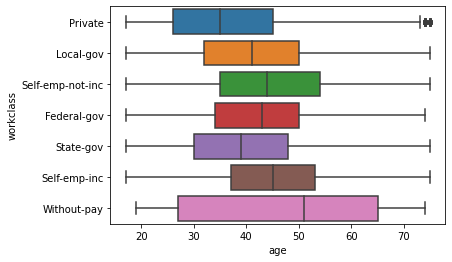

In [56]:
sns.boxplot(x = temp1['age'] , y = categorical_data['workclass'])

From the data it is seen that people with age more than 50 belongs to the without pay category.People of about 45 years of age works as self emploument inc , people of 40 years of age works at state govt , people of 43 years of age works at federal govt , people of 43 years of age works at self employment not inc. , people of 42 years of age works at local govt and people of 35 years of age works at private sectors. people of age 20 years are unemployed.  

<AxesSubplot:xlabel='age', ylabel='education'>

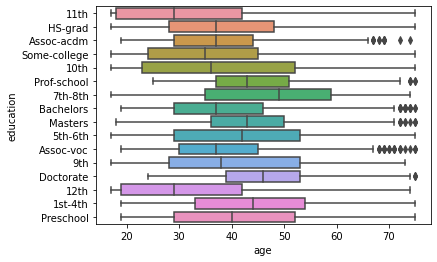

In [57]:
sns.boxplot(x = temp1['age'] , y = categorical_data['education'])

It is seen that people of about 40 years of age has completed class 7 and 8, while people of higher ages(around50) has completed almost all of the academic classes.

<AxesSubplot:xlabel='age', ylabel='marital-status'>

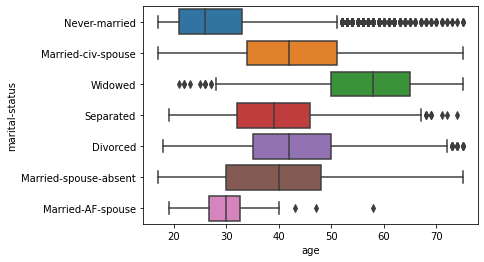

In [58]:
sns.boxplot(x = temp1['age'] , y = categorical_data['marital-status'])

People of age 58 years bwlongs to the widowed category where as people under age 30 are not married.

<AxesSubplot:xlabel='age', ylabel='occupation'>

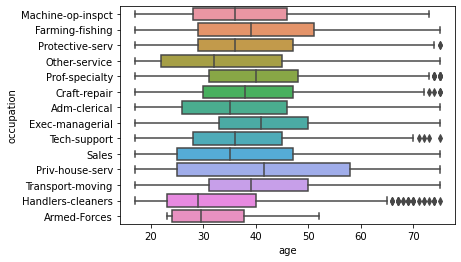

In [59]:
sns.boxplot(x = temp1['age'] , y = categorical_data['occupation'])

People of about 40 years of age are engaged in private house servings where as the young ones of about 30 years are in armed forces.

<AxesSubplot:xlabel='age', ylabel='relationship'>

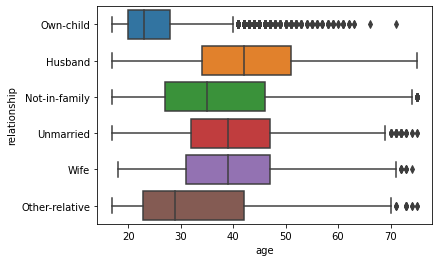

In [60]:
sns.boxplot(x = temp1['age'] , y = categorical_data['relationship'])

The middle aged people (of 42 years of age) have husbands whereas below 25 years of adults have their own child.

<AxesSubplot:xlabel='age', ylabel='race'>

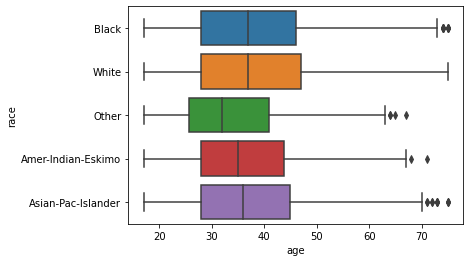

In [61]:
sns.boxplot(x = temp1['age'] , y = categorical_data['race'])

People of about 37 years of age are "white people" while the younger ones (30 years of age) belongs to the others category.

<AxesSubplot:xlabel='age', ylabel='gender'>

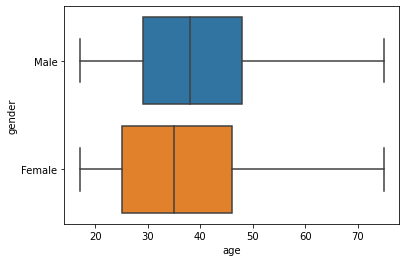

In [62]:
sns.boxplot(x = temp1['age'] , y = categorical_data['gender'])

Among the adults, all the woman are about 35 years old while men are about 37 years old.

<AxesSubplot:xlabel='age', ylabel='native-country'>

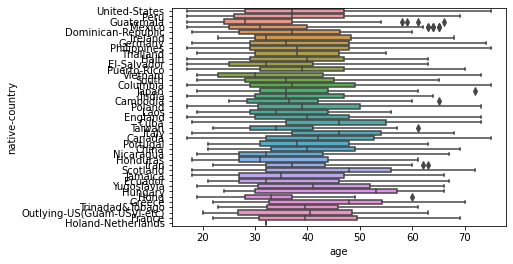

In [63]:
sns.boxplot(x = temp1['age'] , y = categorical_data['native-country'])

People of age 46 years lives in Italy.

<AxesSubplot:xlabel='age', ylabel='income'>

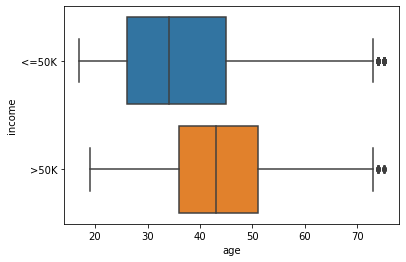

In [65]:
sns.boxplot(x = temp1['age'] , y = categorical_data['income'])

People of age 42 years have income more than 50 thousand and people of 33 years of age have income less than 50 thousand.

# Feature Transformation and Model Building

In [11]:
data1 = data.copy()

In [12]:
#Reindexing the data values to 0 and 1
data1.loc[:,'income']=data1.loc[:,'income'].map({'<=50K':0,'>50K':1})
data1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [13]:
new_data = pd.get_dummies(data1,drop_first = True)

In [14]:
#Storing the column names
columns_list = list(data1.columns)
columns_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [15]:
#Separating the input names from data
features= list(set(columns_list)-set(['income']))
features

['occupation',
 'race',
 'capital-loss',
 'native-country',
 'hours-per-week',
 'fnlwgt',
 'marital-status',
 'age',
 'capital-gain',
 'educational-num',
 'relationship',
 'workclass',
 'gender',
 'education']

In [16]:
#Storing the output values in y
y=new_data['income'].values
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [17]:
#Storing the input values in x
x=new_data.drop('income' , axis=1)
x

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#Splitting the data into testing and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Logistic Regression

In [44]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [45]:
logistic=LogisticRegression()

In [46]:
#Training the model
logistic.fit(x_train,y_train)

LogisticRegression()

In [47]:
#Prediction from test data
prediction_logistic=logistic.predict(x_test)
prediction_logistic

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
#Confusion Matrix
confuse_logistic=confusion_matrix(y_test,prediction_logistic)
confuse_logistic

array([[9752,  390],
       [2575,  850]], dtype=int64)

In [49]:
#Accurcy Score
accuracy_logistic=accuracy_score(y_test,prediction_logistic)
accuracy_logistic

0.7814550011056239

### KNN

In [28]:
#Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)

In [30]:
#Training the model 
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
predict_knn = knn_classifier.predict(x_test)
predict_knn

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [33]:
#Confusion Matrix
confuse_knn=confusion_matrix(y_test,predict_knn)
confuse_knn

array([[9283,  859],
       [2348, 1077]], dtype=int64)

In [34]:
#Accurcy Score
accuracy_knn=accuracy_score(y_test,predict_knn)
accuracy_knn

0.7636176015331319

### Support Vector Machine

In [35]:
#importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
svm_classifier = SVC()

In [37]:
svm_classifier.fit(x_train,y_train)

SVC()

In [38]:
svm_predict=svm_classifier.predict(x_test)
svm_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#Confusion Matrix
confuse_svm=confusion_matrix(y_test,svm_predict)
confuse_svm

array([[10126,    16],
       [ 2938,   487]], dtype=int64)

In [40]:
#Accurcy Score
accuracy_svm=accuracy_score(y_test,svm_predict)
accuracy_svm

0.7822657919952827

# Comparing the accuracies of the three ML models

In [50]:
accuracies = [accuracy_logistic , accuracy_knn , accuracy_svm]

In [53]:
pd.DataFrame(data=accuracies , index = ['Logistic Regression' , 'KNN' , 'SVM'])

,0
Logistic Regression,0.781455
KNN,0.763618
SVM,0.782266


From the values of the accuracies we see that SVM classifier has the highest rate of accuracy followed by Logistic regression classifier and KNN classifier.